# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### Load Dataset

Data setinde; musterilere ait ID numaralari,cinsiyet, yas, yillik gelir, 1-100 arasinda musterinin yaptigi harcamalarin skorlamasi var. Skorlari dusuk olanlar az harcama yapan, yuksek olanlar cok harcama yapan musteriler. 

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Explore Data

You can rename columns to more usable, if you need.

In [ ]:
df.rename(columns={"Annual Income (k$)": "Annual Income",
                   "Spending Score (1-100)": "Spending Score"}, inplace=True)
df

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


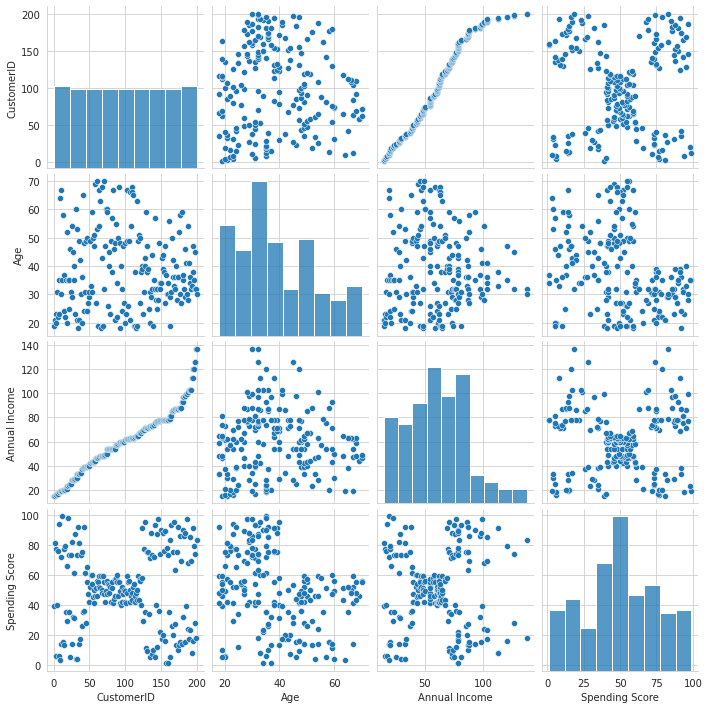

In [ ]:
sns.pairplot(df);

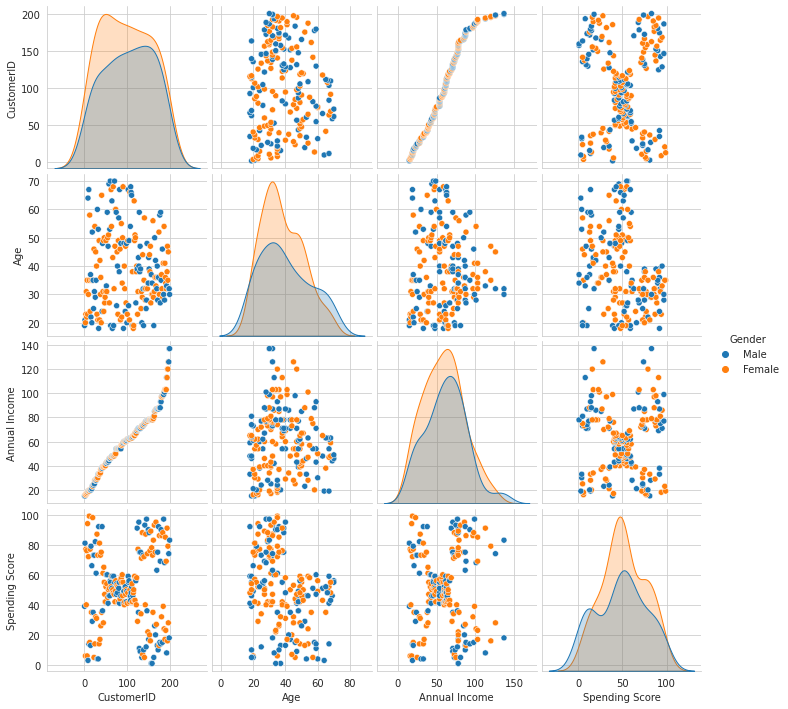

In [ ]:
sns.pairplot(df, hue="Gender");

Yukarıdaki grafikten anladığım: kadınlar daha çok alışveriş yapıyorlar ve erkeklerde alışveriş yapan grup daha orta yaş grubu olarak kalırken, kadınlarda yaşlı kadınların da oldukça alışveriş yaptıklarını anlıyorum. 

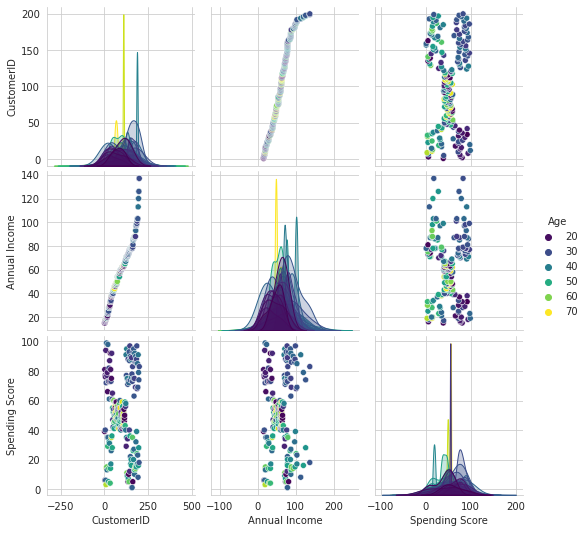

In [ ]:
sns.pairplot(df, hue="Age", palette="viridis");

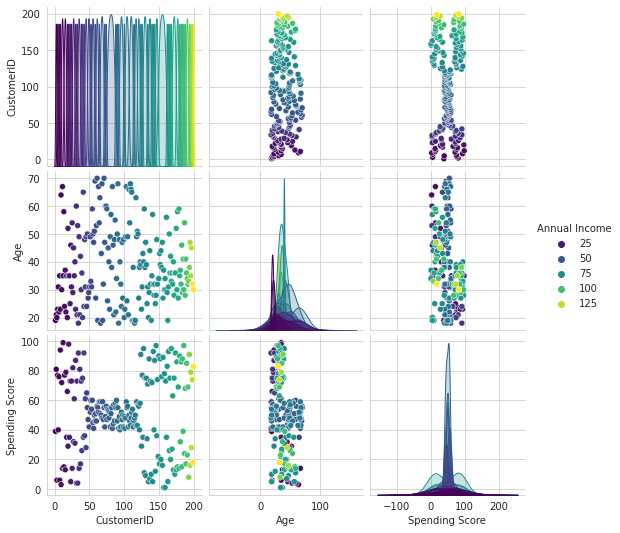

In [ ]:
sns.pairplot(df, hue="Annual Income", palette="viridis");

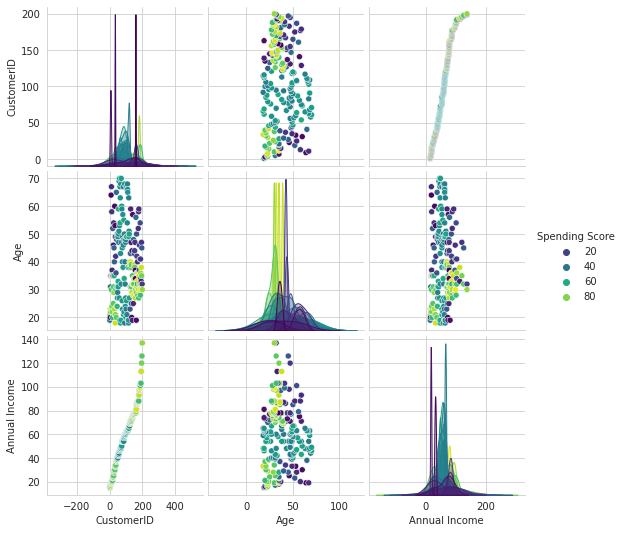

In [ ]:
sns.pairplot(df, hue="Spending Score", palette="viridis");

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score - X1

#### *i. Create a new dataset with two variables of your choice*

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [ ]:
X = df.copy()
A = X.drop(columns=["CustomerID", "Gender", "Annual Income"])

In [ ]:
A

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
K_means_model = KMeans(random_state=42)
# default değerlerle bir model oluşturuyoruz


In [ ]:
K_means_model.fit_predict(A)

array([7, 0, 6, 0, 7, 0, 6, 3, 5, 0, 5, 3, 5, 0, 6, 0, 1, 0, 1, 3, 1, 0,
       5, 0, 5, 3, 1, 0, 1, 3, 5, 0, 5, 3, 5, 0, 5, 0, 1, 0, 2, 3, 1, 0,
       1, 0, 4, 7, 7, 7, 4, 0, 7, 2, 4, 4, 4, 2, 7, 4, 2, 7, 2, 4, 2, 7,
       4, 2, 7, 7, 2, 4, 2, 2, 2, 7, 4, 4, 7, 4, 2, 4, 2, 4, 7, 4, 4, 7,
       0, 4, 2, 7, 4, 1, 7, 7, 4, 7, 4, 7, 7, 4, 2, 7, 4, 7, 2, 4, 2, 2,
       2, 7, 1, 7, 7, 7, 2, 4, 4, 4, 7, 1, 4, 3, 1, 0, 1, 3, 5, 0, 5, 0,
       7, 0, 6, 3, 5, 0, 6, 0, 5, 3, 7, 3, 6, 3, 1, 0, 1, 3, 5, 3, 5, 0,
       5, 3, 6, 0, 6, 0, 1, 3, 6, 3, 1, 0, 1, 3, 1, 0, 6, 0, 6, 3, 5, 3,
       5, 0, 5, 3, 1, 3, 5, 3, 1, 3, 5, 0, 5, 3, 1, 0, 6, 3, 5, 0, 1, 0,
       6, 3], dtype=int32)

In [ ]:
A["Classes"] = K_means_model.labels_

In [ ]:
A

,Age,Spending Score,Classes
0,19,39,7
1,21,81,0
2,20,6,6
3,23,77,0
4,31,40,7
...,...,...,...
195,35,79,0
196,45,28,1
197,32,74,0
198,32,18,6


#### *ii. Determine optimal number of clusters*

### Elbow Method

In [ ]:
ssd = []

K = range(1, 9)  # n_clusters'ın default değeri 8 olduğu için range i 9 ile bitirdim.

for k in K:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(A)
  ssd.append(model.inertia_)


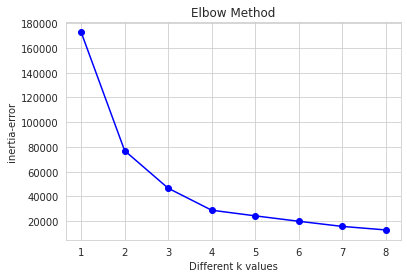

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.show();

In [ ]:
ssd

[172670.67999999993,
 77016.33554987214,
 46707.62328508827,
 28935.13690029986,
 24371.63511266382,
 20002.351761411897,
 15846.899315454195,
 13003.424821716126]

In [ ]:
pd.Series(ssd).diff()

0             NaN
1   -95654.344450
2   -30308.712265
3   -17772.486385
4    -4563.501788
5    -4369.283351
6    -4155.452446
7    -2843.474494
dtype: float64

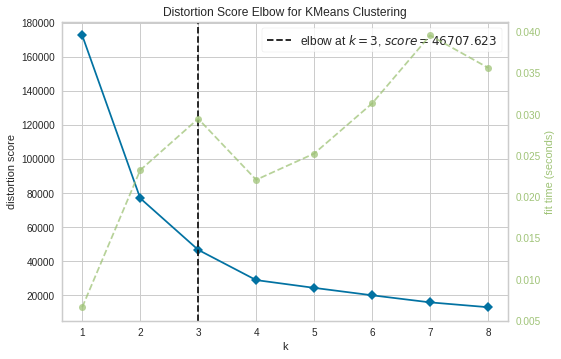

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(1, 9))

visualizer.fit(A)
visualizer.show();

### Why silhouette_score is negative?

In [ ]:
A

,Age,Spending Score,Classes
0,19,39,7
1,21,81,0
2,20,6,6
3,23,77,0
4,31,40,7
...,...,...,...
195,35,79,0
196,45,28,1
197,32,74,0
198,32,18,6


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
range_n_clusters= range(2,9)  # range i 1'den başlatınca hata verdi bu işlemde 2 den başlat
for num_clusters in range_n_clusters:
    k_means = KMeans(n_clusters=num_clusters, random_state=42)
    k_means.fit(A)
    cluster_labels = k_means.labels_
    silhouette_avg = silhouette_score(A, cluster_labels)
    print(f"For n_clusters={num_clusters},the silhouette score is: {silhouette_avg}")

For n_clusters=2,the silhouette score is: 0.4658659627736171
For n_clusters=3,the silhouette score is: 0.450662419796652
For n_clusters=4,the silhouette score is: 0.4960883689697109
For n_clusters=5,the silhouette score is: 0.4587914015803979
For n_clusters=6,the silhouette score is: 0.41873196664492573
For n_clusters=7,the silhouette score is: 0.4257617479654678
For n_clusters=8,the silhouette score is: 0.4475455818642027


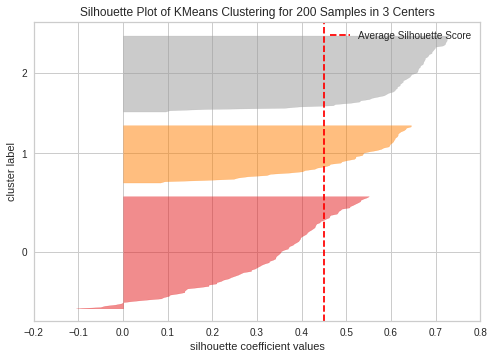

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(A)
visualizer.poof();

In [ ]:
A

,Age,Spending Score,Classes
0,19,39,7
1,21,81,0
2,20,6,6
3,23,77,0
4,31,40,7
...,...,...,...
195,35,79,0
196,45,28,1
197,32,74,0
198,32,18,6


__Silhouette Score-->__ (1-√2) / √2 = -0.29

#### *iii. Apply K Means*

In [ ]:
model_age_ss = KMeans(n_clusters=3, random_state=42)
model_age_ss.fit_predict(A)

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [ ]:
clusters_age_ss = model_age_ss.labels_
clusters_age_ss

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [ ]:
A["predicted_clusters"] = clusters_age_ss

In [ ]:
A

,Age,Spending Score,Classes,predicted_clusters
0,19,39,7,0
1,21,81,0,2
2,20,6,6,1
3,23,77,0,2
4,31,40,7,0
...,...,...,...,...
195,35,79,0,2
196,45,28,1,1
197,32,74,0,2
198,32,18,6,1


In [ ]:
X

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
A.columns

Index(['Age', 'Spending Score', 'Classes', 'predicted_clusters'], dtype='object')

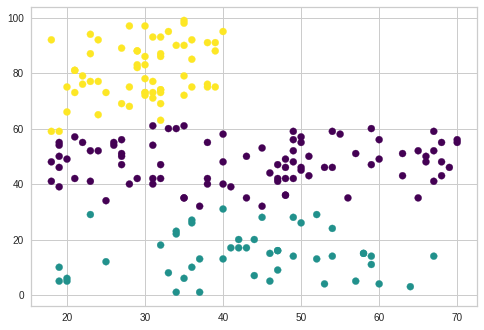

In [ ]:
plt.scatter(A["Age"], A["Spending Score"], c=A.predicted_clusters, cmap="viridis");

In [ ]:
centers = model_age_ss.cluster_centers_
centers

array([[43.05494505, 47.78021978,  3.91208791],
       [42.95744681, 14.59574468,  4.34042553],
       [29.56451613, 80.74193548,  1.58064516]])

In [ ]:
centers[:, 0]  # centers of age feature

array([43.05494505, 42.95744681, 29.56451613])

In [ ]:
centers[:, 1]  # centers of spending score feature

array([47.78021978, 14.59574468, 80.74193548])

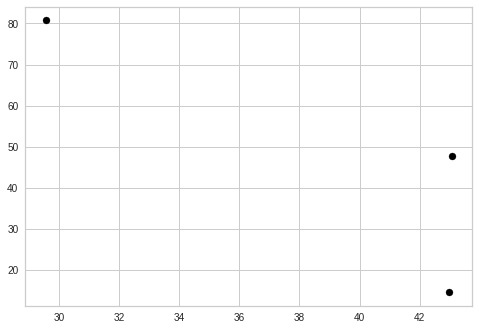

In [ ]:
plt.scatter(centers[:, 0], centers[:, 1], c="black");

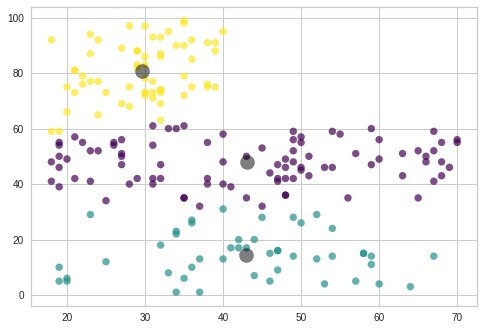

In [ ]:
plt.scatter(A["Age"], A["Spending Score"], c=A.predicted_clusters,
            cmap="viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5);

In [ ]:
A

,Age,Spending Score,Classes,predicted_clusters
0,19,39,7,0
1,21,81,0,2
2,20,6,6,1
3,23,77,0,2
4,31,40,7,0
...,...,...,...,...
195,35,79,0,2
196,45,28,1,1
197,32,74,0,2
198,32,18,6,1


In [ ]:
clus_pred_age_ss = A.iloc[:, [0, 1, 3]].groupby("predicted_clusters").mean().T
clus_pred_age_ss

predicted_clusters,0,1,2
Age,43.054945,42.957447,29.564516
Spending Score,47.780220,14.595745,80.741935


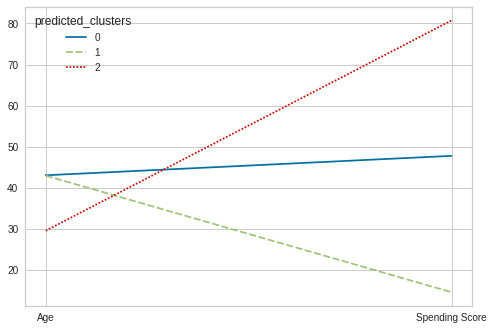

In [ ]:
sns.lineplot(data=clus_pred_age_ss);

### Clustering based on Annual Income and Spending Score - X2

In [ ]:
X.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

#### *i. Create a new dataset with two variables of your choice*

In [ ]:
B = X.drop(columns=["CustomerID", "Gender", "Age"])

In [ ]:
B

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### *ii. Determine optimal number of clusters*

In [ ]:
ssd = []

K = range(1, 9)

for k in K:
  model = KMeans(n_clusters=k, random_state=42)
  model.fit(B)
  ssd.append(model.inertia_)

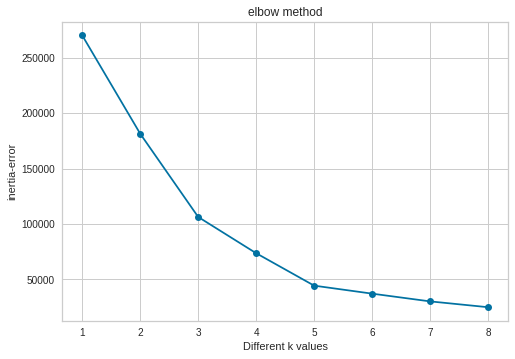

In [ ]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")
plt.show();

In [ ]:

ssd

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588]

In [ ]:
pd.Series(ssd).diff()

0             NaN
1   -88617.684040
2   -75015.222897
3   -32668.584023
4   -29231.333592
5    -7214.640937
6    -6974.157303
7    -5247.817858
dtype: float64

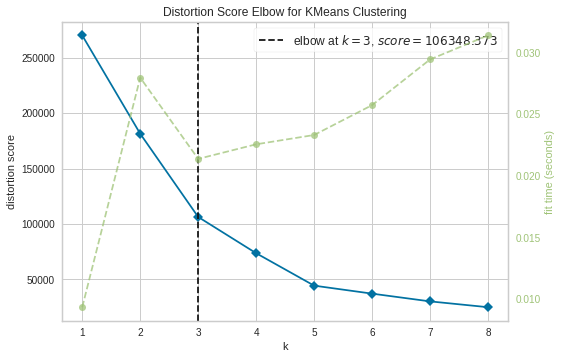

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=range(1, 9))

visualizer.fit(B)
visualizer.show();

#### *iii. Apply K Means*

In [ ]:
B.columns

Index(['Annual Income', 'Spending Score'], dtype='object')

In [ ]:
model_ai_ss = KMeans(n_clusters=3, random_state=42)
model_ai_ss.fit_predict(B)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [ ]:
clusters = model_ai_ss.labels_

In [ ]:
B["predicted_clusters"] = clusters

In [ ]:
B

,Annual Income,Spending Score,predicted_clusters
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


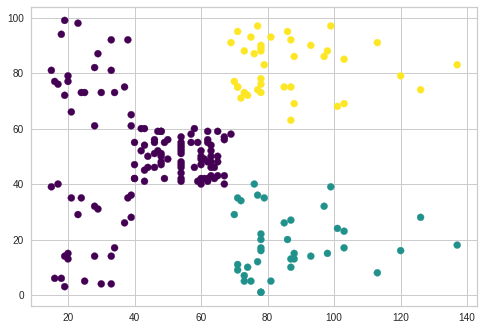

In [ ]:
plt.scatter(B["Annual Income"], B["Spending Score"], c=B.predicted_clusters, cmap="viridis");

In [ ]:
centers = model_ai_ss.cluster_centers_
centers

array([[44.15447154, 49.82926829],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

In [ ]:
centers[:, 0]  # centers of Annual Income feature

array([44.15447154, 87.        , 86.53846154])

In [ ]:
centers[:, 1]  # centers of Spending Score feature

array([49.82926829, 18.63157895, 82.12820513])

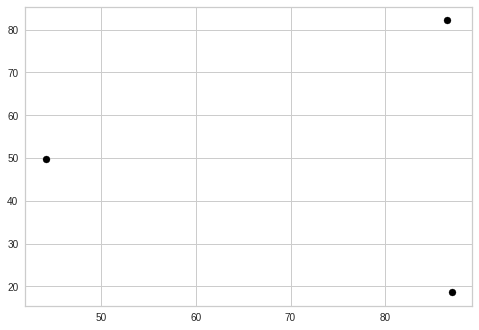

In [ ]:
plt.scatter(centers[:, 0], centers[:, 1], c="black");

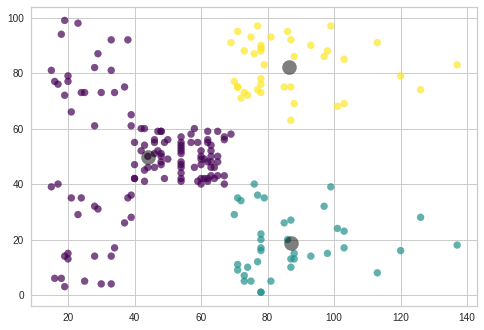

In [ ]:
plt.scatter(B["Annual Income"], B["Spending Score"], c=B.predicted_clusters,
            cmap="viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5);

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Clustering based on Age and Spending Score- X1

In [ ]:
hc_ward = linkage(y=A, method="ward")  # varyansa göre
hc_complete = linkage(A, method="complete")   # en uzak noktaya göre
hc_average = linkage(A, method="average")  # ortalamaya göre
hc_single = linkage(A, method="single")  # en yakın noktaya göre


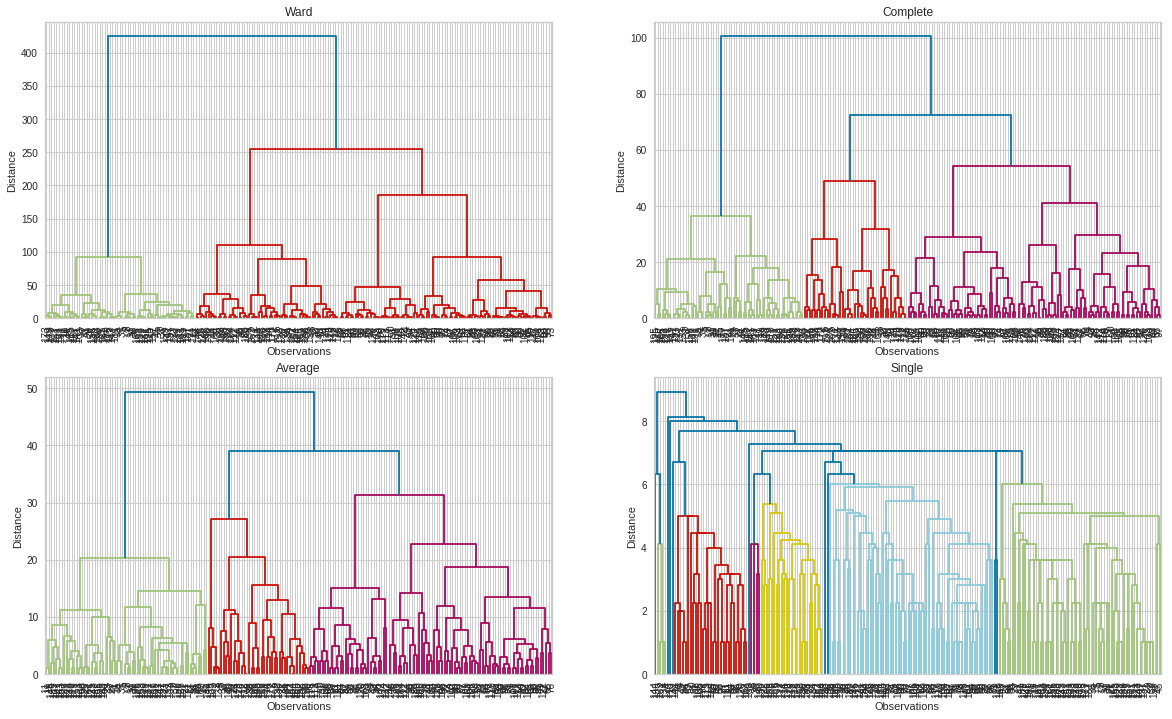

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10);

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10);

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10);

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10);

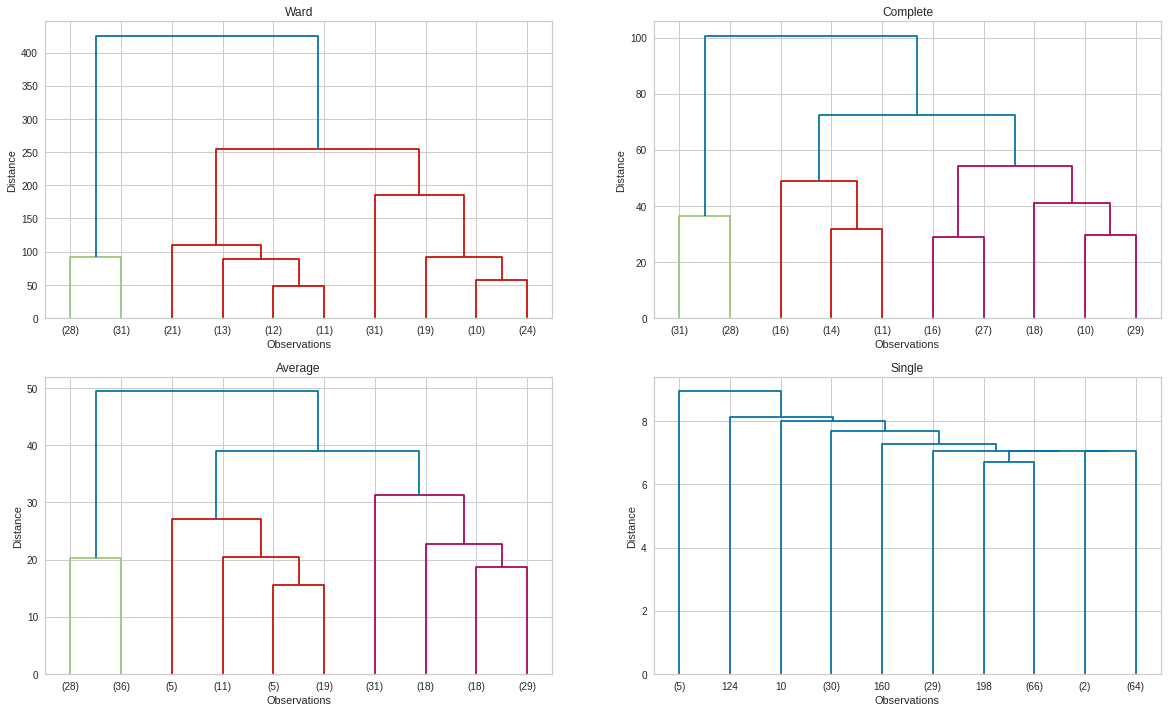

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode="lastp", p=10);

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode="lastp", p=10);

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode="lastp", p=10);

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode="lastp", p=10);

## Clustering based on Annual Income and Spending Score- X2

In [ ]:
hc_ward_B = linkage(y=B, method="ward")  # varyansa göre
hc_complete_B = linkage(B, method="complete")   # en uzak noktaya göre
hc_average_B = linkage(B, method="average")  # ortalamaya göre
hc_single_B = linkage(B, method="single")  # en yakın noktaya göre


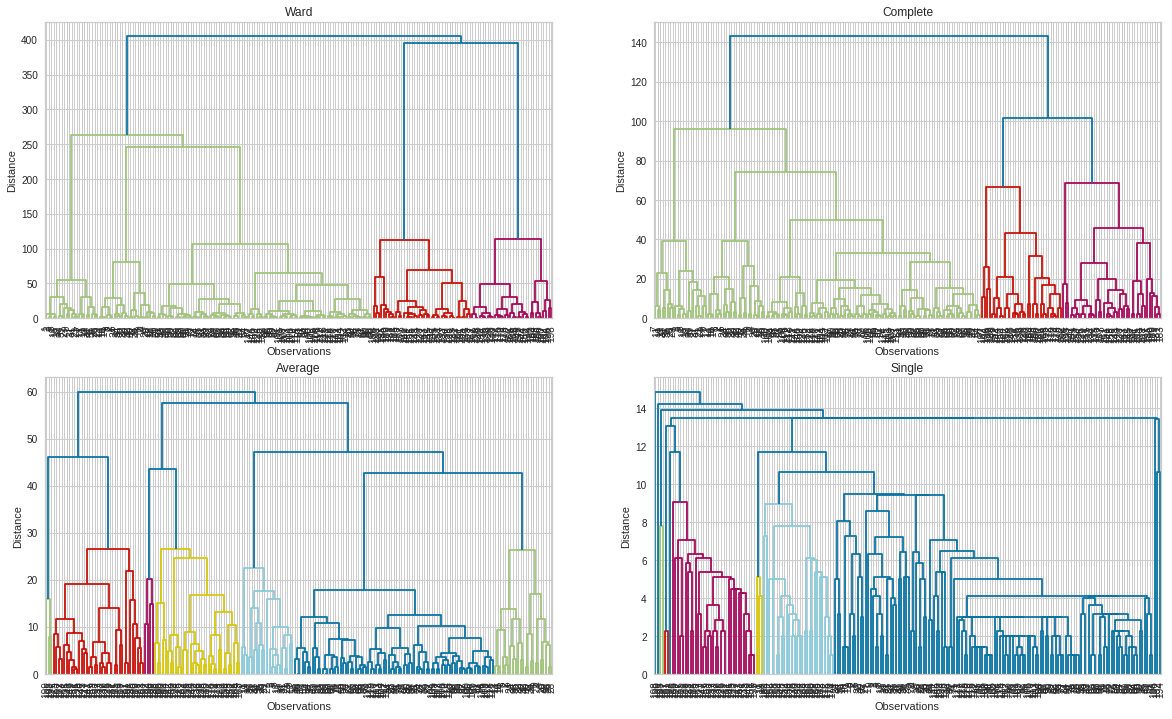

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward_B, leaf_font_size=10);

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete_B, leaf_font_size=10);

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average_B, leaf_font_size=10);

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single_B, leaf_font_size=10);

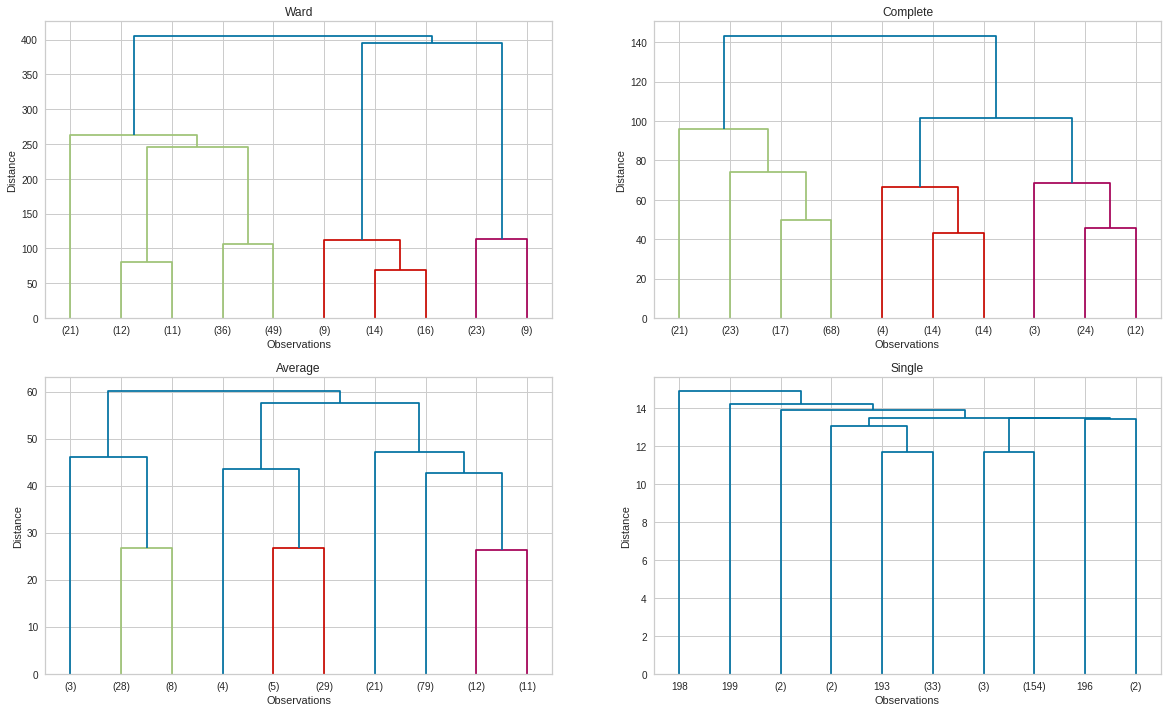

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward_B, leaf_font_size=10, truncate_mode="lastp", p=10);

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete_B, leaf_font_size=10, truncate_mode="lastp", p=10);

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average_B, leaf_font_size=10, truncate_mode="lastp", p=10);

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single_B, leaf_font_size=10, truncate_mode="lastp", p=10);

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- X1

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
K = range(2, 9)
for k in K:
  model_hc_A = AgglomerativeClustering(n_clusters=k)
  model_hc_A.fit_predict(A)
  print("f'Silhouette Score for", {k}, "clusters", {silhouette_score(A, model_hc_A.labels_)})

f'Silhouette Score for {2} clusters {0.46126084501476683}
f'Silhouette Score for {3} clusters {0.4214226447165478}
f'Silhouette Score for {4} clusters {0.4792473396798529}
f'Silhouette Score for {5} clusters {0.42911123007558744}
f'Silhouette Score for {6} clusters {0.4346989002870494}
f'Silhouette Score for {7} clusters {0.4035096098575069}
f'Silhouette Score for {8} clusters {0.42193105124695657}


#### Annual Income and Spending Score- X2

In [ ]:
K = range(2, 9)
for k in K:
  model_hc_B = AgglomerativeClustering(n_clusters=k)
  model_hc_B.fit_predict(B)
  print("f'Silhouette Score for", {k}, "clusters", {silhouette_score(B, model_hc_B.labels_)})

f'Silhouette Score for {2} clusters {0.367324832073066}
f'Silhouette Score for {3} clusters {0.46212162561965187}
f'Silhouette Score for {4} clusters {0.4918143517815908}
f'Silhouette Score for {5} clusters {0.5531444363179322}
f'Silhouette Score for {6} clusters {0.5381504305076681}
f'Silhouette Score for {7} clusters {0.5200276249266164}
f'Silhouette Score for {8} clusters {0.43263684651287376}


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- X1

In [ ]:
model_A = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
model_A.fit_predict(A)

array([3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2,
       0, 1, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3,
       2, 2, 2, 3, 2, 0, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 0, 3, 3, 3, 2, 2, 2, 2, 3, 0, 2, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [ ]:
model_A.labels_

array([3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2,
       0, 1, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3,
       2, 2, 2, 3, 2, 0, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 0, 3, 3, 3, 2, 2, 2, 2, 3, 0, 2, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

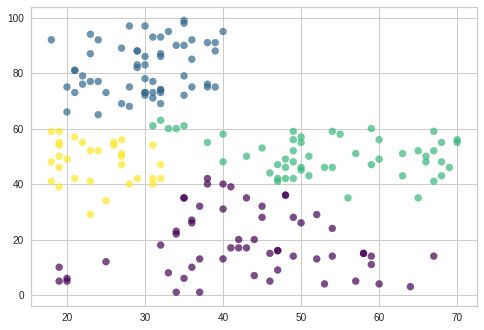

In [ ]:
plt.scatter(A["Age"], A["Spending Score"], c=model_A.labels_, cmap="viridis", alpha=0.7);

#### Annual Income and Spending Score- X2

In [ ]:
model_B = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
model_B.fit_predict(B)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
model_B.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

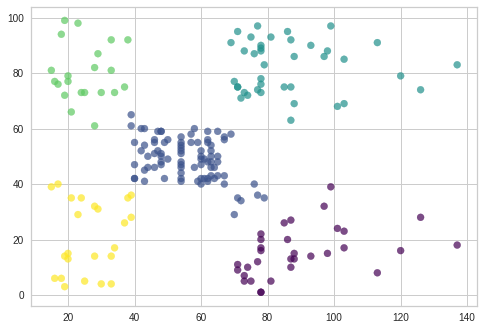

In [ ]:
plt.scatter(B["Annual Income"], B["Spending Score"], c=model_B.labels_,
            cmap="viridis", alpha=0.7);


#### Interpretation based on Age and Spending Score- X1

### Conclusion

**cluster 0** : The average age is around 56. both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43. the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 28. Both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- X2

## Conclusion

### Female

**cluster 0** : The average age is around 41, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 43, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, the annula_income is very high but the spending_scores is very low. This group is our target audience and special strategies need to be developed for this group.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.